In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    
register_matplotlib_converters()

In [36]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [37]:
def read_dataset(path,col_name,parser):
    data = pd.read_csv(path,index_col=0,parse_dates=[0],squeeze=True,date_parser=parser)
    data.rename(col_name,inplace=True)
    data = data.asfreq(pd.infer_freq(data.index))
    return data

In [38]:
def plot_data(revised_data,title,yLabel):
    plt.figure(figsize=(10,5))
    plt.plot(revised_data)
    plt.title(title, fontsize=20)
    plt.ylabel(yLabel, fontsize=16)
    return plt.show

In [39]:
url = "https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv"
data = read_dataset(url,'Production',parser)
data.head()

DATE
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
Freq: MS, Name: Production, dtype: float64

In [40]:
start_date = datetime(2010,1,1)
revised_data = data[start_date:]

<function matplotlib.pyplot.show(close=None, block=None)>

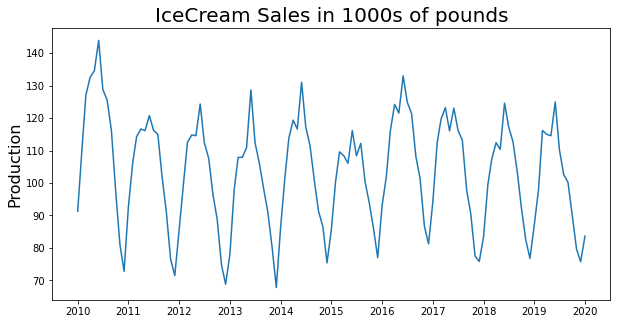

In [41]:
plot_data(revised_data,'IceCream Sales in 1000s of pounds','Production')

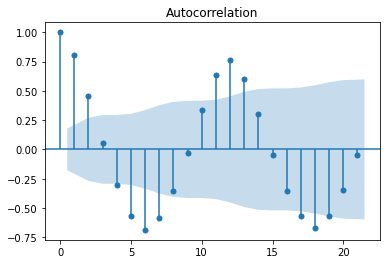

In [42]:
acf_plot = plot_acf(revised_data) 

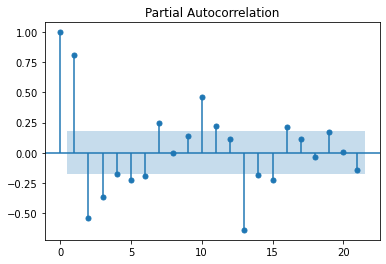

In [43]:
pacf_plot = plot_pacf(revised_data)

## Normalize

In [44]:
avg, dev = data.mean(), data.std()

In [45]:
production_series = (data-avg) / dev
production_series.head()

DATE
1972-01-01   -1.779484
1972-02-01   -1.525535
1972-03-01   -1.268861
1972-04-01   -1.130157
1972-05-01   -0.892190
Freq: MS, Name: Production, dtype: float64

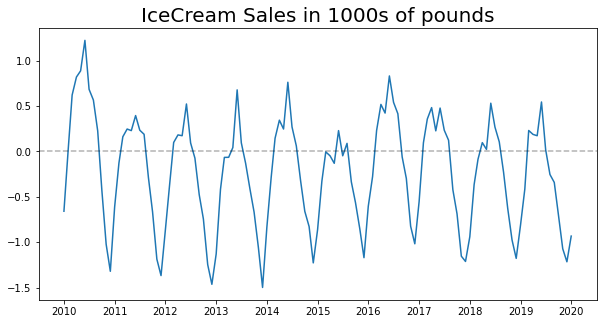

In [85]:
plt.figure(figsize=(10,5))
plt.plot(production_series[start_date:])
plt.title('IceCream Sales in 1000s of pounds', fontsize=20)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

In [53]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)
train_data = production_series[:train_end]
test_data = production_series[train_end+timedelta(days=1):test_end]

## ARIMA

In [65]:
arima_model = ARIMA(train_data,order=(3,1,2))
model_fit = arima_model.fit(disp=0)

C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

In [66]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Production   No. Observations:                  563
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 -18.925
Method:                       css-mle   S.D. of innovations              0.249
Date:                Thu, 10 Jun 2021   AIC                             51.851
Time:                        08:51:23   BIC                             82.184
Sample:                    02-01-1972   HQIC                            63.692
                         - 12-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0013      0.006      0.223      0.824      -0.010       0.013
ar.L1.D.Production     1.5309      0.042     36.430      0.000       1.449       1.613
ar.L2.D.Production  

In [67]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date

Timestamp('2019-01-01 00:00:00', freq='MS')

In [69]:
prediction = model_fit.predict(start = pred_start_date, end=pred_end_date,dynamic=True)

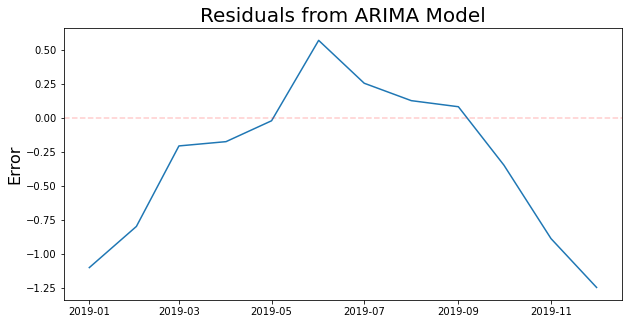

In [70]:
residual = test_data - prediction
plt.figure(figsize=(10,5))
plt.plot(residual)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

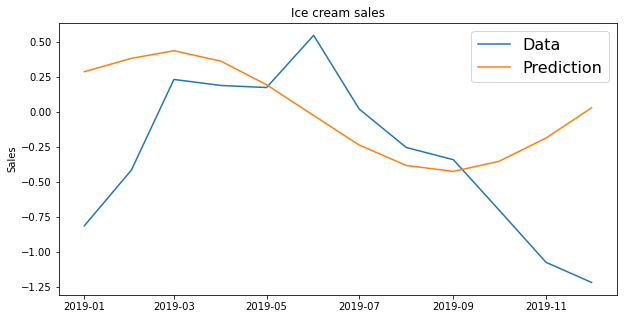

In [71]:
plt.figure(figsize=(10,5))
plt.plot(test_data)
plt.plot(prediction)
plt.legend(('Data','Prediction'),fontsize=16)
plt.title("Ice cream sales")
plt.ylabel("Sales")

## SARIMA

In [80]:
std_order = (3,1,2)
seasonal_order = (0,1,1,12)
sarima_model = SARIMAX(train_data,order=std_order,seasonal_order=seasonal_order)

In [81]:
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                           Production   No. Observations:                  564
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 287.177
Date:                              Thu, 10 Jun 2021   AIC                           -560.354
Time:                                      09:06:59   BIC                           -530.172
Sample:                                  01-01-1972   HQIC                          -548.561
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2779      0.053    -23.962      0.000      -1.382      -1.173
ar.L2         -1.12

In [82]:
sarima_prediction = sarima_fit.predict(start = pred_start_date,end = pred_end_date)

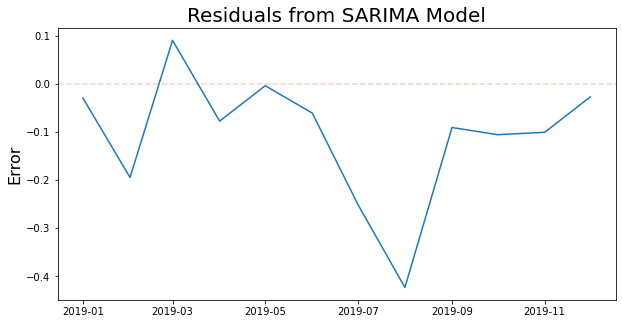

In [83]:
sarima_residual = test_data - sarima_prediction
plt.figure(figsize=(10,5))
plt.plot(sarima_residual)
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

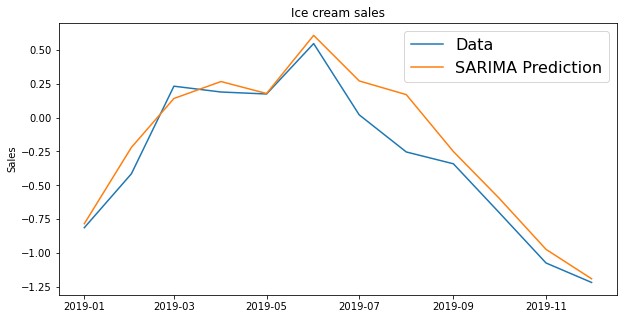

In [84]:
plt.figure(figsize=(10,5))
plt.plot(test_data)
plt.plot(sarima_prediction)
plt.legend(('Data','SARIMA Prediction'),fontsize=16)
plt.title("Ice cream sales")
plt.ylabel("Sales")